<a href="https://colab.research.google.com/github/OJShearer/Learning/blob/main/WineQuality_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


In [1]:
# https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
# Red wine quality dataset

import pandas as pd
import numpy as np

df = pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Q. Define the problem domain

Regression problem to predict the quality of wine given statistics about the levels of acidity and other chemicals.

### Q. Identify candidate questions for your machine learning project

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

### Q. Generate a descriptive statistics report for the columns in your dataset

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

No missing entries - check for balance of data, outliers, and how correlated data is.

Q. Is there any correlation in the data? How would you decide which columns to keep?

In [8]:
import seaborn as sns

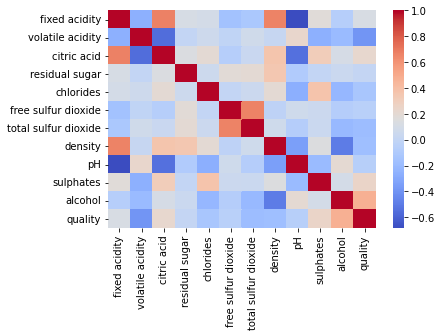

In [11]:
sns.heatmap(df.corr(), cmap='coolwarm')

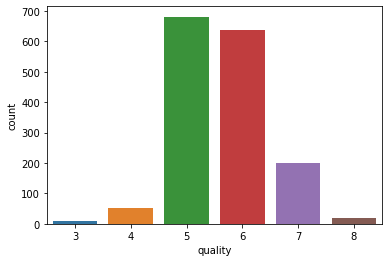

In [10]:
sns.countplot(data=df, x='quality')

Q. Are there any outliers in the dataset? What do you do with them?

In [ ]:
# OPTIONAL
# Z-Score
# check for values >3 and <-3
# What do i do with them?
# 1) Remove them 
# 2) replace all >3 with max, <-3 with min
# 3) Ignore

# Detecting Frauds, Anomalies 

In [15]:
z_score = (df - df.mean()) / df.std()

In [27]:
df[(z_score > 3) | (z_score < -3)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         12 non-null     float64
 1   volatile acidity      10 non-null     float64
 2   citric acid           1 non-null      float64
 3   residual sugar        30 non-null     float64
 4   chlorides             31 non-null     float64
 5   free sulfur dioxide   22 non-null     float64
 6   total sulfur dioxide  15 non-null     float64
 7   density               18 non-null     float64
 8   pH                    8 non-null      float64
 9   sulphates             27 non-null     float64
 10  alcohol               8 non-null      float64
 11  quality               10 non-null     float64
dtypes: float64(12)
memory usage: 150.0 KB


Q. Split the data for TRAINING and SCORING (testing). OPTIONAL: Discuss what problems could happen we have poor distribution b/w training and testing?

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('quality',axis=1), df['quality'], test_size=0.3, random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [ ]:
# for loop b/w all your models

# xtrain,xtest, ytrain,ytest = train_test_split

# model.fit-> xTRAIN , xTEST
# predictions = model.predict(xtest)
# accuracy_score/rmse/mae/precision for (predictions, ytest)

# MAJOR-> string/ranges values-> convert into numbers


In [42]:
# models
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
# metric
from sklearn.metrics import mean_squared_error

models = [Ridge(), SVR(kernel='linear'), SVR(kernel='rbf'), RandomForestRegressor(), XGBRegressor()]

for algo in models:
  # Instantiate, fit, predict
  mod = algo
  mod.fit(X_train_s, y_train)
  predictions = mod.predict(X_test_s)
  # Test score
  MSE = mean_squared_error(y_test, predictions)
  RMSE = np.sqrt(MSE)
  print(RMSE)

0.6412667559248854
0.6486001051410989
0.6124627883042303
0.582601386026501
[15:21:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.6214513264220592


Random forest has lowest root mean squared error, so is best algorithm to begin with.

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

params = {'n_estimators':[100,200,400,600], 'max_features':('auto','sqrt')}
grid = GridSearchCV(RandomForestRegressor(), params, scoring='neg_mean_squared_error', verbose=1)

grid.fit(X_train_s, y_train)

print(grid.best_params_) 
grid_predictions = grid.predict(X_test_s) 
   
print(np.sqrt(mean_squared_error(y_test, grid_predictions)))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'max_features': 'sqrt', 'n_estimators': 400}
0.5696951510274303


Reduced loss slightly with grid search on parameters.